## Arbeidskrav 4 - Sok 1005

I dette arbeidskravet skal jeg ta utgangpunkt i denne nettsiden: https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132, og tabellen som illustrerer forskjellen mellom det leverandører påstår er kjørelengden til bilen, og det motor/NAFs har funnet ut faktisk er bilens kjørelengde.

For å løse denne oppgaven vil jeg benytte meg av pyhton kode, der jeg først vil skrape nettsiden for unødvendig data, og lagre daten i en dataramme. Jeg vil rydde datarammen for unødvendig data og lage kolonner med den dataen jeg trenger. 

Så vil jeg lage en regeresjonslinje av daten, og plotte denne mot datapunktene og leverandørenes påståtte kjørelengde.

Til slutt vil jeg skrive en konklujson og forklaring av funnen mine

### Oppgave 1.

Her skal vi skrape nettsiden og lagre de nødvendige datene i en dataramme.

In [4]:
# Henter nødevendige pakker
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
# Henter URL til nettsiden
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
# Finne tabellen (tilpasses etter nettsidens struktur)
table = soup.find('table')

# Lese inn tabellen til pandas
if table:
    df = pd.read_html(str(table))[0]
else:
    df = pd.DataFrame()

print(df.head)


<bound method NDFrame.head of    Modell (temp. varierte fra 0° til -10°)        WLTP-tall   STOPP     Avvik
0              Tesla Model 3 LR Dual motor  614 km/14,7 kWh  521 km  -15,15 %
1             Mercedes-Benz EQS 580 4matic  645 km/18,3 kWh  513 km  -20,47 %
2                          BMW iX xDrive50  591 km/21,4 kWh  503 km  -14,89 %
3              Tesla Model Y LR Dual motor  507 km/16,9 kWh  451 km  -11,05 %
4                    Volkswagen ID.3 PRO S  539 km/16,3 kWh  435 km  -19,29 %
5                              Kia EV6 2WD  528 km/16,5 kWh  429 km  -18,75 %
6                       NIO ES8 LR 7-seter  488 km/21,5 kWh  425 km  -12,91 %
7                              Kia EV6 4WD  484 km/18,0 kWh  423 km  -12,60 %
8                      Volkswagen ID.4 Pro  485 km/18,4 kWh  414 km  -14,64 %
9                      Hyundai Ioniq 5 2WD  481 km/16,8 kWh  408 km  -15,18 %
10                              BMW i4 M50  497 km/19,0 kWh  406 km  -18,31 %
11                       Skoda Eny

/var/folders/sb/zlqhz2pj7qx987rw7fkdqjbw0000gn/T/ipykernel_2496/2542261603.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Her har vi hentet den daten vi trenger for å sammenligne levenrandørenes påståtte rekkevidde og den faktiske rekkevidden som motor/NAF har funnet

### Oppgave 2

Nå skal vi rydde i datarammen som vi har laget over. Dette gjør vi for å fjerne unødvendig data, og gjør datarammen enklere å jobbe med.

In [8]:
# Rydder opp i datasettet
df.columns = ["Modell", "WLTP", "STOPP", "Avvik"]
df["WLTP"] = df["WLTP"].astype(str).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
df["STOPP"] = df["STOPP"].astype(str).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

# Fjerne rader med NaN
df.dropna(subset=["WLTP", "STOPP"], inplace=True)

print(df.head)

<bound method NDFrame.head of                              Modell  WLTP  STOPP     Avvik
0       Tesla Model 3 LR Dual motor   614    521  -15,15 %
1      Mercedes-Benz EQS 580 4matic   645    513  -20,47 %
2                   BMW iX xDrive50   591    503  -14,89 %
3       Tesla Model Y LR Dual motor   507    451  -11,05 %
4             Volkswagen ID.3 PRO S   539    435  -19,29 %
5                       Kia EV6 2WD   528    429  -18,75 %
6                NIO ES8 LR 7-seter   488    425  -12,91 %
7                       Kia EV6 4WD   484    423  -12,60 %
8               Volkswagen ID.4 Pro   485    414  -14,64 %
9               Hyundai Ioniq 5 2WD   481    408  -15,18 %
10                       BMW i4 M50   497    406  -18,31 %
11                Skoda Enyaq iV80X   477    403  -15,51 %
12   Porsche Taycan 4 Cross Turismo   456    402  -11,84 %
13       Polestar 2 LR Single motor   517    400  -22,63 %
14                   Audi e-tron GT   463    392  -15,33 %
15                        

Her gir vi kolonnen riktige navn, henter ut tall fra tekst, og fjerner rader med manglende verdier

### Oppgave 3

Nå skal jeg lage en ny kolonne som viser forholdet mellom levert antall kilometer og påståtte antall kilometer.


In [9]:
# Legge til en ny kolonne med forholdet mellom faktisk og oppgitt rekkevidde
df["Forhold"] = df["STOPP"] / df["WLTP"]
print(df)

                             Modell  WLTP  STOPP     Avvik   Forhold
0       Tesla Model 3 LR Dual motor   614    521  -15,15 %  0.848534
1      Mercedes-Benz EQS 580 4matic   645    513  -20,47 %  0.795349
2                   BMW iX xDrive50   591    503  -14,89 %  0.851100
3       Tesla Model Y LR Dual motor   507    451  -11,05 %  0.889546
4             Volkswagen ID.3 PRO S   539    435  -19,29 %  0.807050
5                       Kia EV6 2WD   528    429  -18,75 %  0.812500
6                NIO ES8 LR 7-seter   488    425  -12,91 %  0.870902
7                       Kia EV6 4WD   484    423  -12,60 %  0.873967
8               Volkswagen ID.4 Pro   485    414  -14,64 %  0.853608
9               Hyundai Ioniq 5 2WD   481    408  -15,18 %  0.848233
10                       BMW i4 M50   497    406  -18,31 %  0.816901
11                Skoda Enyaq iV80X   477    403  -15,51 %  0.844864
12   Porsche Taycan 4 Cross Turismo   456    402  -11,84 %  0.881579
13       Polestar 2 LR Single moto

Her ser vi at vi har fått en ny kolonne som heter forhold. Vi finner forhold ved å dele STOPP, som er den faktiske rekkvidden, med WLTP, som er den oppgitte rekkevidden fra leverandøren. Vi kan tolke forholdene på denne måten: 

Forhold = 1 -> Bilen kjører akuratt så langt som leverandøren oppgir.
Forhold < 1 -> Bilen kjører kortere enn det leverandøren oppgir.
Forhold > 1 -> Bilen kjører lengre enn det leverandøren har oppgitt

Det kolonnen viser oss er at ingen av bilene i testen kjører like fort som det leverandørene sier, og alle bilene i testen kjører også kortene enn det leverandørerne har oppgitt.

### Oppgave 4 

I denne delen skal jeg lage en regresjonslinje av typen f(x) = ax + b, der WLTP-km er en uavhengig variabel. 

In [15]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Regresjonsanalyse
X = add_constant(df["WLTP"])  
Y = df["STOPP"]
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  STOPP   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           7.66e-14
Time:                        13:17:29   Log-Likelihood:                -142.80
No. Observations:                  31   AIC:                             289.6
Df Residuals:                      29   BIC:                             292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.6450     31.210     -0.854      0.4

Resultatet viser oss en OLS regresjon, som estimerer forholdet mellom WLTP-rekkevidden (uavhengig variabel) og den faktiske rekkevidden STOPP (avhengig variabel).

R-squared 0.858, forteller oss hvor godt modellen forklarer sammenhengen. 0.858 betyr at 85,8% av variasjonen i STOPP kan forklares av den uavhengige variablen WLTP. Dette er en høy sammenheng som sier oss at modellen passer godt med dataene. Det betyr at WLTP alene forklarer mesteparten av variasjonen, men det kan være andre faktorer (temperatur, kjørestil, dekktype osv.) som også påvirker faktisk rekkevidde.

WLTP har en koeffisient (coef) på 0.8671. Dette forteller oss at for hver ekstra oppgitte km i rekkevidde fra leverandøren, øker den faktiske rekkevidden med 0.8671 km i gjennomsnitt. Koeffisienten er <1, som beytr at bilene generelt går kortere enn oppgitt. WLPT-koeffisienten har en P-verdi på 0, som betyr at sammenhengen ikke er tilfeldig.

Konstantleddet (const) er -26.640, som vil si at dersom en WLTP bil hadde rekkevidde på 0 km, ville den forventede faktiske rekkevidden være -26.65 km. Dette er data som ikke gir mening i praksis. Vi ser også at konstantleddet har en P-verdi på 0.400, som understreker at konstantleddet ikke er statisktiks signinfikant.

Samlet sett viser modellen at det er en sterk sammenheng mellom oppgitt og faktisk rekkevidde, men at bilene i gjennomsnitt presterer noe dårligere enn leverandørens oppgitte WLTP-verdier.


### Oppgave 5

Nå skal jeg plotte en figur som viser regresjonsmodellen som vi lagde over, mot STOPP og WLTP datapunktene. Jeg skal lage to ulike varianter av dette plottet. Først et plott som kunn inkludere dataene fra datarammen, så et plott utvidet plott som går gjennom 0 (origo).

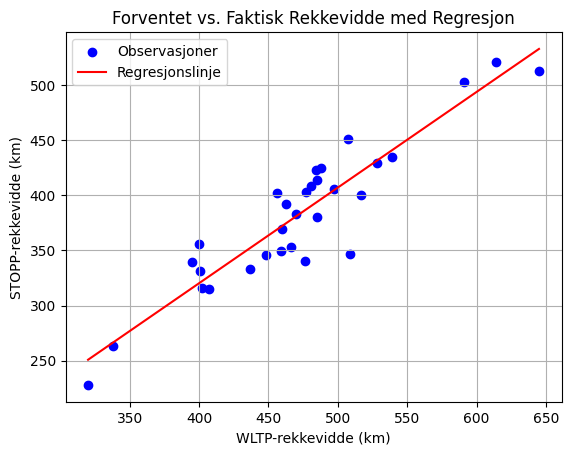

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Hente regresjonskoeffisientene
intercept = model.params["const"]
slope = model.params["WLTP"]

# Generere x-verdier for linjen
x = np.linspace(df["WLTP"].min(), df["WLTP"].max(), 100)

# Beregne y-verdiene for regresjonslinjen
regression_line = intercept + slope * x

# Ploter datapunktene
plt.scatter(df["WLTP"], df["STOPP"], color="blue", label="Observasjoner")

# Ploter regresjonslinjen
plt.plot(x, regression_line, color="red", label="Regresjonslinje")

# Legger til tittel og aksenavn
plt.xlabel("WLTP-rekkevidde (km)")
plt.ylabel("STOPP-rekkevidde (km)")
plt.title("Forventet vs. Faktisk Rekkevidde med Regresjon")

# Legger til rutenett og forklaring
plt.legend()
plt.grid(True)

# Viser plottet
plt.show()


Figur 1 viser oss sammenhengen mellom den oppgitte rekkevidden (WLTP) og den faktiske rekkvidden (STOP) fra datarammmen vår. De blå prikkene representere ett kjøretøy, vi ser at antall kilometer på x-aksen (WLTP) ikke er lik med antall kilometer på y-aksen (STOPP). Dette understreker våre funn fra tidligere i oppgaven at oppgitt rekkevidde ikke stemmer med faktisk rekkevidde. Den røde linjen som går igjennom daten er regresjonslinjen. Dette er den gjennomsnittlige sammenhengen mellom WLTP og STOPP

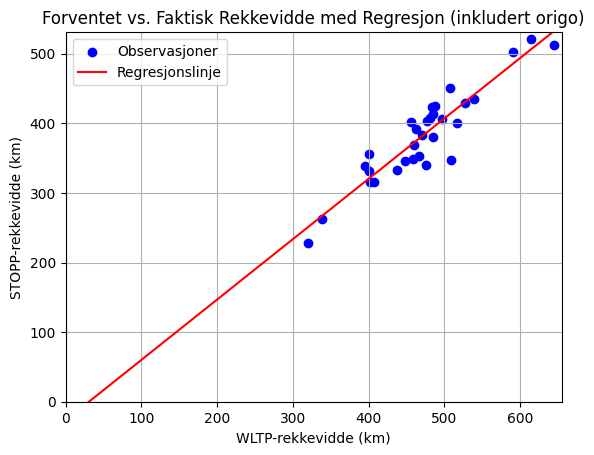

In [24]:

# Henteer regresjonskoeffisientene
intercept = model.params["const"]
slope = model.params["WLTP"]

# Genererer x-verdier som starter fra 0 for å inkludere origo
x = np.linspace(0, df["WLTP"].max(), 100)

# Beregner y-verdiene for regresjonslinjen
regression_line = intercept + slope * x

# Ploter datapunktene
plt.scatter(df["WLTP"], df["STOPP"], color="blue", label="Observasjoner")

# Ploter regresjonslinjen
plt.plot(x, regression_line, color="red", label="Regresjonslinje")

# Legger til origo i aksene
plt.xlim(0, df["WLTP"].max() + 10)
plt.ylim(0, df["STOPP"].max() + 10)

# Leger til tittel og aksetiketter
plt.xlabel("WLTP-rekkevidde (km)")
plt.ylabel("STOPP-rekkevidde (km)")
plt.title("Forventet vs. Faktisk Rekkevidde med Regresjon (inkludert origo)")

# Legger til rutenett og forklaring
plt.legend()
plt.grid(True)

# Viser plottet
plt.show()


Figur 2 bruker fortsatt de samme dataene fra datarammen, men nå er origo (0.0) inkludert. Ved å inkludere origo for vi en visell observasjon på hvordan modellen ser ut når vi får lavere eller nullverdier. Vi ser at regresjonslinjen ikke går gjennom null, dette forteller oss at når WLTP-rekkevidden er null, vil den faktiske rekkevidden være negativ. Dette stemmer godt med det vi så i modellen i stad, der konstantleddet var -26.6450.

### Oppgave 6

Nå kommer det en analyse av funnene som har blitt gjort

Vi har undersøkt sammmenhengen mellom oppgitt km rekkevidde på biler fra leverandører, og den faktiske rekkvidden som bilene har. Formålet med denne analysen har vært å vurdere om oppgitt rekkevidde stemmer med faktiskt rekkevidde, og om det finnes systematiske avvik.

For å gjøre dette av vi gjort regresjonsanalyse av dataene. Vi har sett på avviket mellom oppgitt og faktisk rekkevidde, og ut fra analysen tolket om funnene var statisktisk signifikante. 

Hovedfunnene fra analysen viser at WLTP har en positiv sammenheng med STOPP, men at den faktiske rekkvidden i gjennomsnitt er lavere enn den oppgitte rekkevidden. Koeffisienten for WLTP er 0.8671, som betyr at for hver ekstra kilometer oppgitt rekkevidde, øker den faktiske rekkevidden med bare 
0.8672 km. Videre viser gjennomnsittlig avvik at alle bilene har lavere faktisk rekkevidde enn oppgitt.

Differansen mellom WLTP og STOPP i kolonnen 'forhold' gir en regresjonskoeffisient mindre enn 1 for alle biler, noe som viser at bilene kjører kortere enn det leverandørene oppgir. Dette samsvarer godt med avviket mellom faktisk kjørte kilometer og oppgitte kilometer i kolonnen 'avvik', der avviket også er negativt for alle biler. 

I konklusjonene fra plottene i oppagave 5 ser vi tydelig at WLTP og STOPP ikke samsvarer. For få til plottet har ikke dataen blitt manipulert, og plottet understreker analysen som har blitt gjort, både med og uten origo. 

Basert på analysen kan vi ikke med høy sannsynlighet si at leverandørene holder det de lover. Regresjonsanalysen og avvikene viser at alle bilene i datarammen har lavere rekkevidde enn det som er oppgitt fra leverandøren. Gjennomsnittlig avvik viser at det er systematisk tendens til at den faktiske rekkvidden er lavere enn den oppgitte.